<a href="https://colab.research.google.com/github/soyoonjeong/MachineLearning/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 데이터 살펴보기 및 전처리 

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/datasets/항공 만족도/train.csv")
test = pd.read_csv("/content/drive/MyDrive/datasets/항공 만족도/test.csv")
pd.set_option('display.max_columns',None) # 요약 x
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

- Arrival Delay in Minutes에 null 값 존재 -> 대체 어떻게 하지 
- Gender, Customer Type, Type of Travel, Class, satisfaction 은 문자열 형태이므로 변환 필요 

In [ ]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### EDA : feature 분포 시각화 

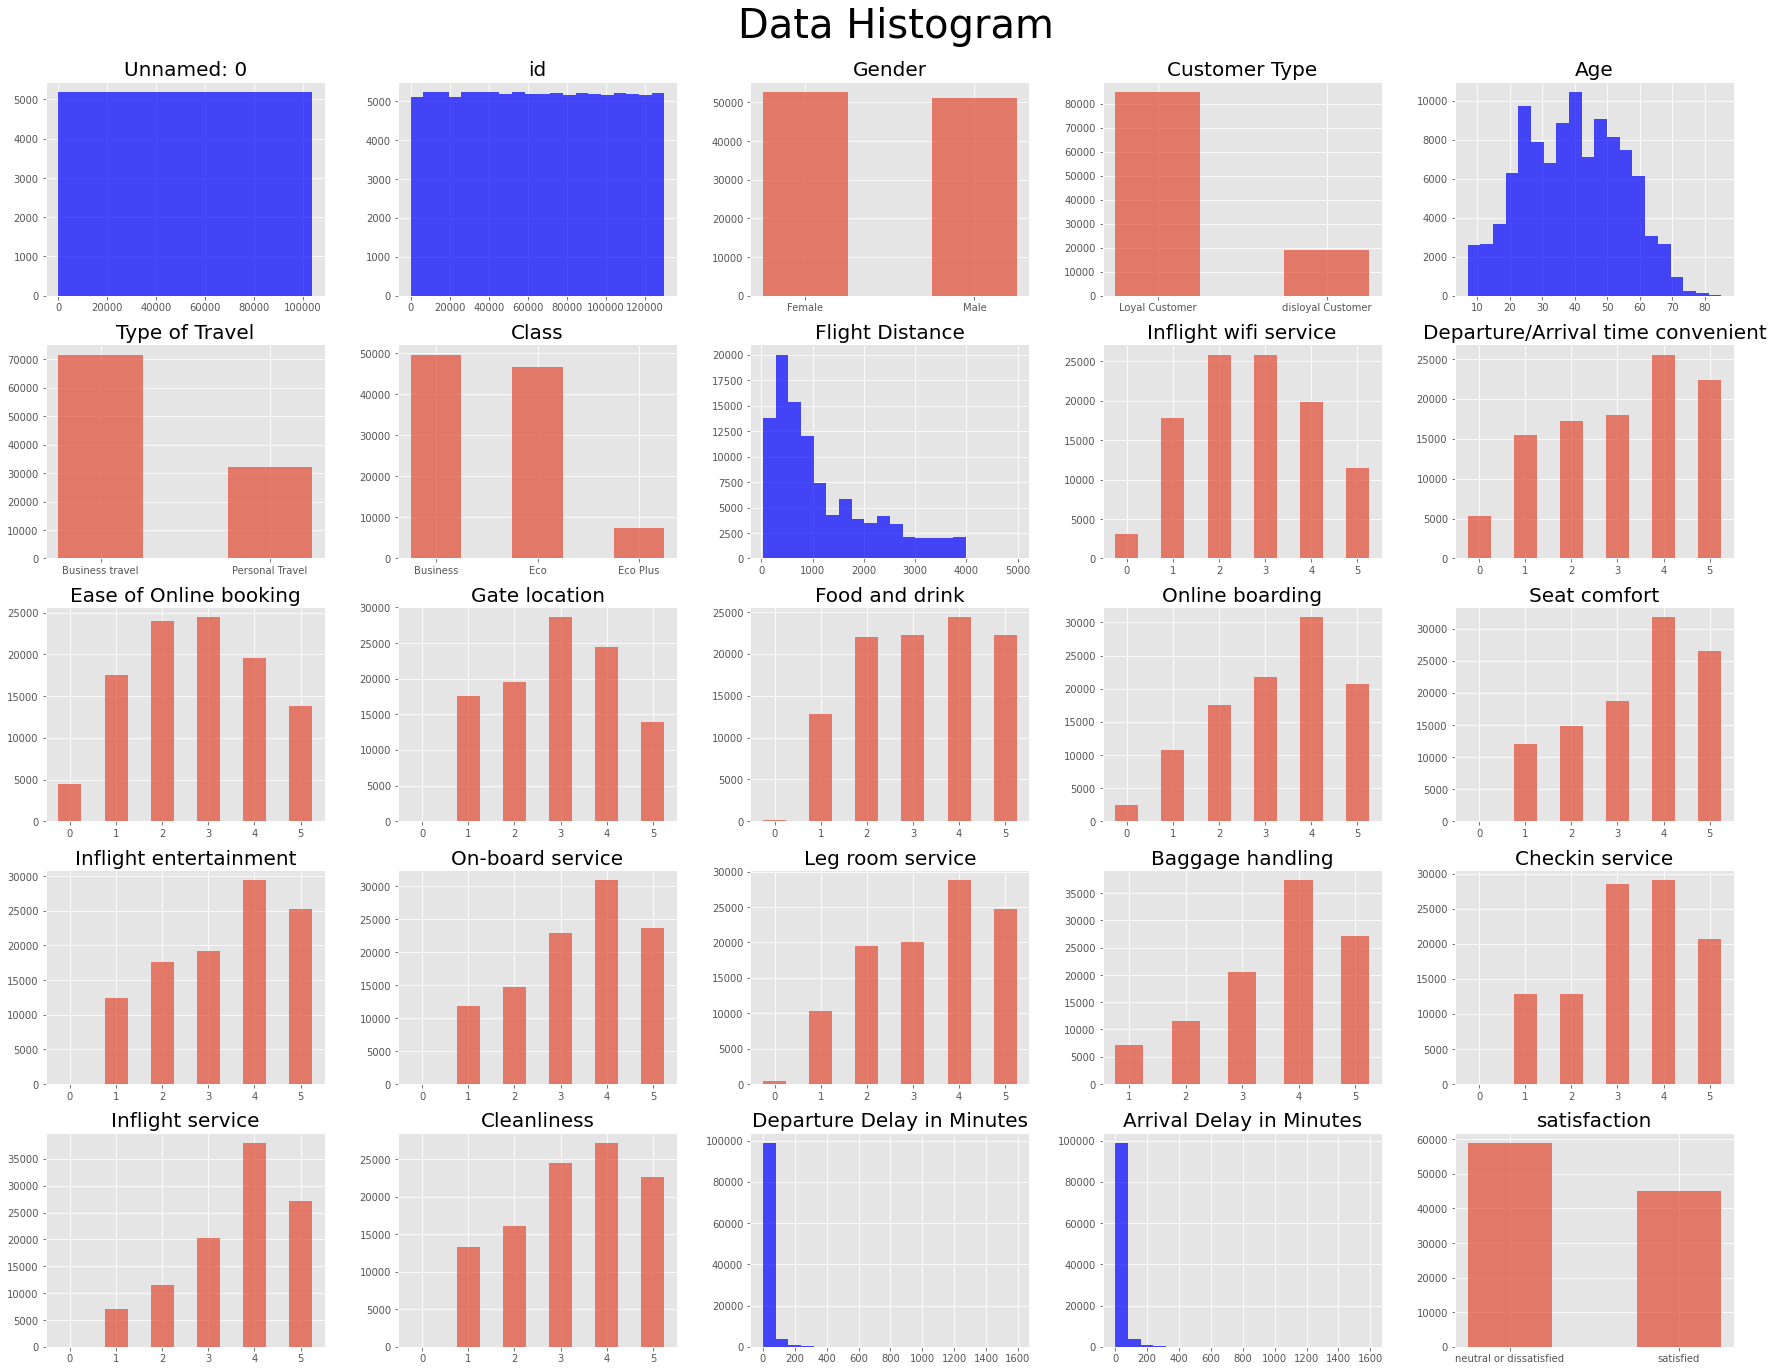

In [ ]:
plt.style.use('ggplot')

# 히스토그램을 이용하여 데이터 분포 살펴보기
plt.figure(figsize = (25,20))
plt.suptitle('Data Histogram', fontsize = 40)

cols = train.columns
for i in range(len(cols)):
  plt.subplot(5,5,i+1)
  plt.title(cols[i], fontsize = 20)
  if len(train[cols[i]].unique())>20:
    plt.hist(train[cols[i]], bins =20, color = 'b', alpha = 0.7)
  else:
    temp = train[cols[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width = 0.5, alpha = 0.7)
    plt.xticks(temp.keys())
plt.tight_layout(rect = [0,0.03, 1, 0.95])
plt.show()

#### EDA : target과 feature의 관계

In [ ]:
from sklearn.preprocessing import LabelEncoder
column = 'satisfaction'
le = LabelEncoder()
le.fit(train[column])
le_encoded = le.transform(train[column])
train[column] = le_encoded
print(le.classes_)
train.head()

['neutral or dissatisfied' 'satisfied']


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


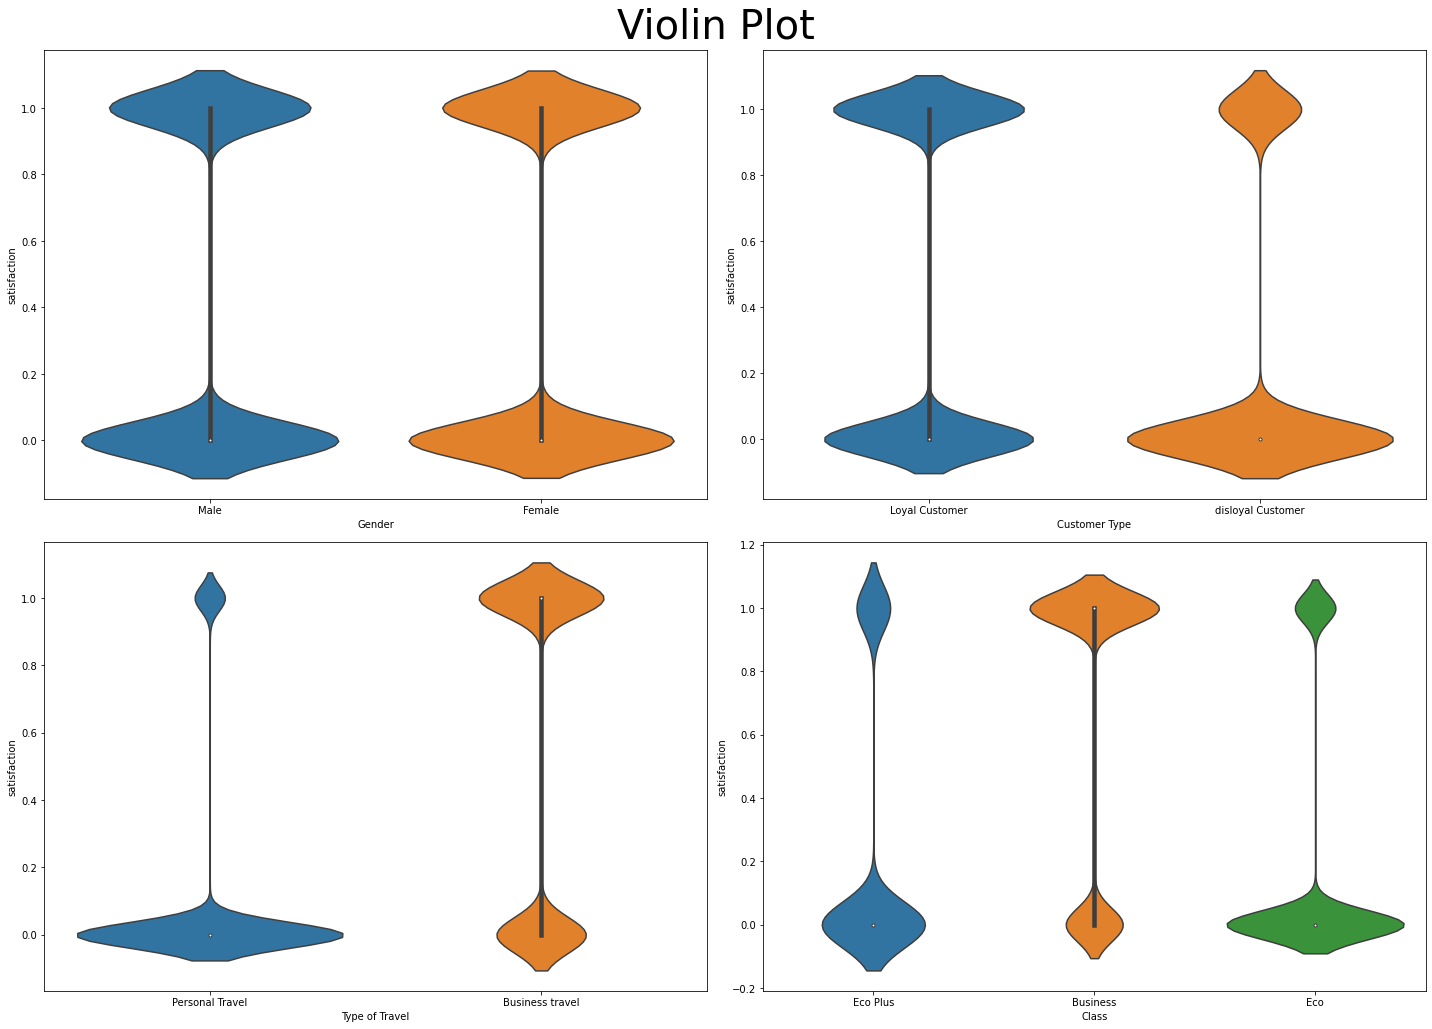

In [ ]:
# 카테고리형 feature과 target 관계 
target = 'satisfaction'

categorical_feature = train.columns[train.dtypes=='object']
plt.figure(figsize = (20,15))
plt.suptitle('Violin Plot', fontsize = 40)

for i in range(len(categorical_feature)):
  plt.subplot(2,2,i+1)
  plt.xlabel(categorical_feature[i])
  plt.ylabel(target)
  sns.violinplot(x = train[categorical_feature[i]], y= train[target])
plt.tight_layout(rect = [0,0.03, 1,0.95])
plt.show()

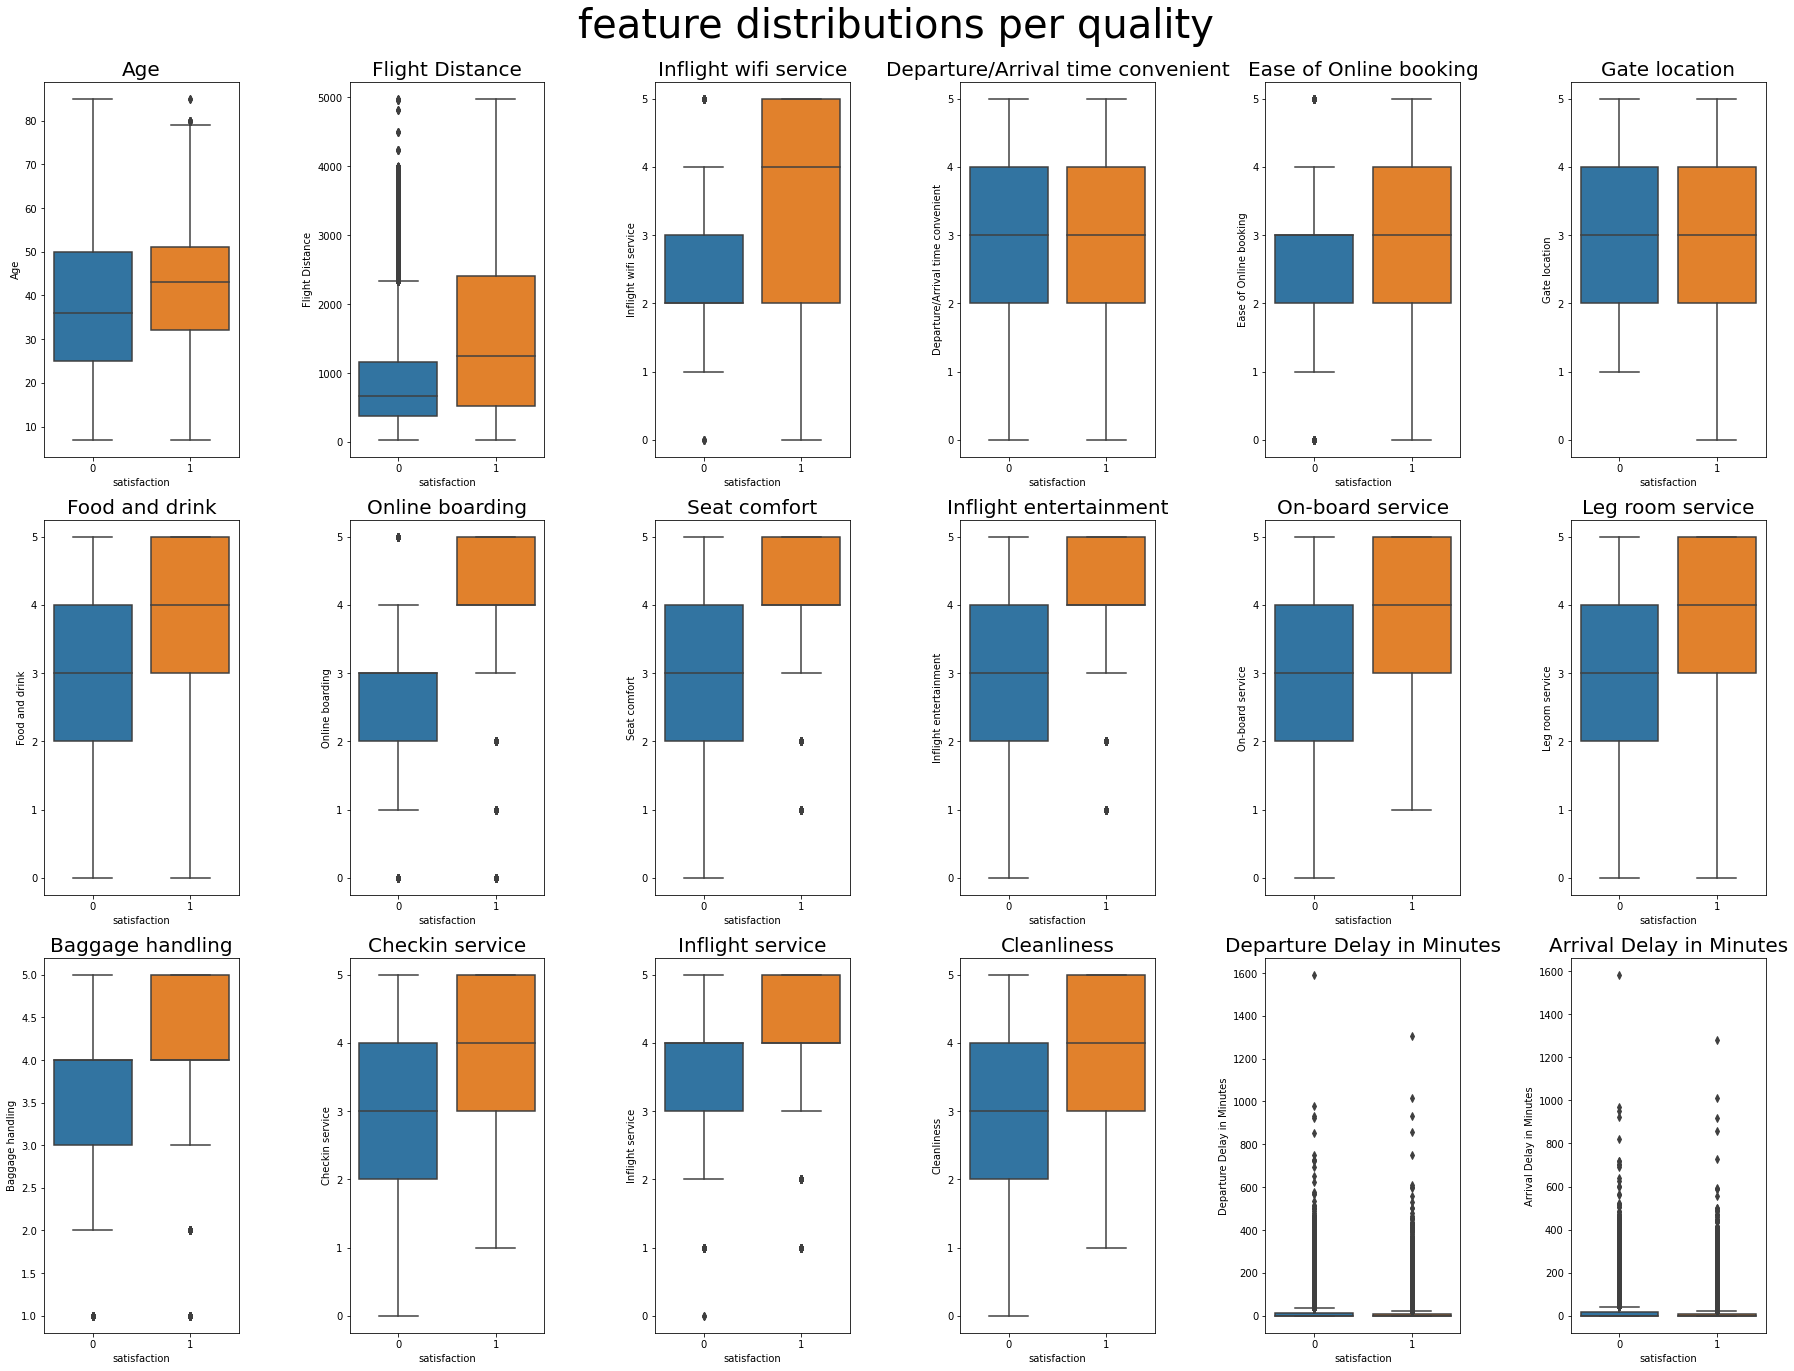

In [ ]:
# 수치형 feature과 target 관계 
numeric_feature = train.columns[train.dtypes !='object']
num_data = train[numeric_feature]

fig, axes = plt.subplots(3,6, figsize = (25,20))
fig.suptitle('feature distributions per quality',fontsize = 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
  sns.boxplot(x = 'satisfaction', y = col, ax = ax, data = num_data)
  ax.set_title(col, fontsize = 20)
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

age, Depatrue/Arrival time convenient, gate location과 같은 변수는 satisfaction에 영향 없는 듯 

#### 전처리 : 쓸모없는 열 삭제 

In [ ]:
train = train.drop(train.iloc[:,[0,1]], axis = 1) # 1,2 번째 열 삭제 

In [ ]:
train = train.drop(['Age', 'Departure/Arrival time convenient'], axis = 1) 

#### 전처리 : 결측치 대체 
뭔가 출발 지연 시간이랑 도착 지연 시간이랑 비슷할 거 같음 

(array([     0.,      0.,      0.,      0.,      0., 103904.,      0.,
             0.,      0.,      0.]),
 array([-50., -40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 10 Patch objects>)

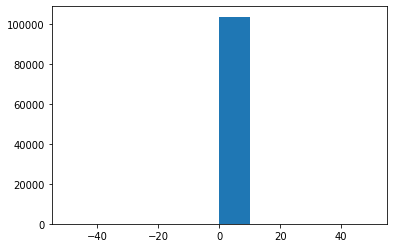

In [ ]:
plt.hist(train['Arrival Delay in Minutes']-train['Departure Delay in Minutes'], range = (-50,50), bins = 10)

In [ ]:
np.mean(train['Arrival Delay in Minutes']-train['Departure Delay in Minutes'])

0.4307392320018534

In [ ]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(train['Departure Delay in Minutes'])

In [ ]:
train

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,460,3,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,Business travel,Business,235,3,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,Business travel,Business,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,192,2,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,Business travel,Business,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,Business travel,Business,1995,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,Business travel,Eco,1000,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [ ]:
train.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
Flight Distance               0
Inflight wifi service         0
Ease of Online booking        0
Gate location                 0
Food and drink                0
Online boarding               0
Seat comfort                  0
Inflight entertainment        0
On-board service              0
Leg room service              0
Baggage handling              0
Checkin service               0
Inflight service              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

#### 전처리 : 문자열 형태 변환 

In [ ]:
column_list = ['Gender', 'Customer Type','Type of Travel','Class'] 
for column in column_list:
  print(column)
  print(train[column].value_counts())
  print("--------------------------------------------")

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
--------------------------------------------
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
--------------------------------------------
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
--------------------------------------------
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
--------------------------------------------


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in column_list:
  le.fit(train[column])
  le_encoded = le.transform(train[column])
  train[column] = le_encoded
  print(le.classes_)
train.head()

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']


,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,1,2,460,3,3,1,5,3,5,5,4,3,4,4,5,5,25,25,0
1,1,1,0,0,235,3,3,3,1,3,1,1,1,5,3,1,4,1,1,1,0
2,0,0,0,0,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,1
3,0,0,0,0,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,11,0
4,1,0,0,0,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0,1


#### 전처리 : 정규화 

In [ ]:
from sklearn.preprocessing import StandardScaler

num_features = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

scaler = StandardScaler()
scaler.fit(train[num_features])
train[num_features] = scaler.transform(train[num_features])
train.head()

,Gender,Customer Type,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,-0.731539,3,3,1,5,3,5,5,4,3,4,4,5,5,0.266393,0.070988,0
1,Male,disloyal Customer,Business travel,Business,-0.957184,3,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,-0.238223,0
2,Female,Loyal Customer,Business travel,Business,-0.047584,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,-0.392828,1
3,Female,Loyal Customer,Business travel,Business,-0.629246,2,5,5,2,2,2,2,2,5,3,1,4,2,-0.099805,-0.160920,0
4,Male,Loyal Customer,Business travel,Business,-0.978244,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,-0.392828,1


#### EDA : 상관관계 

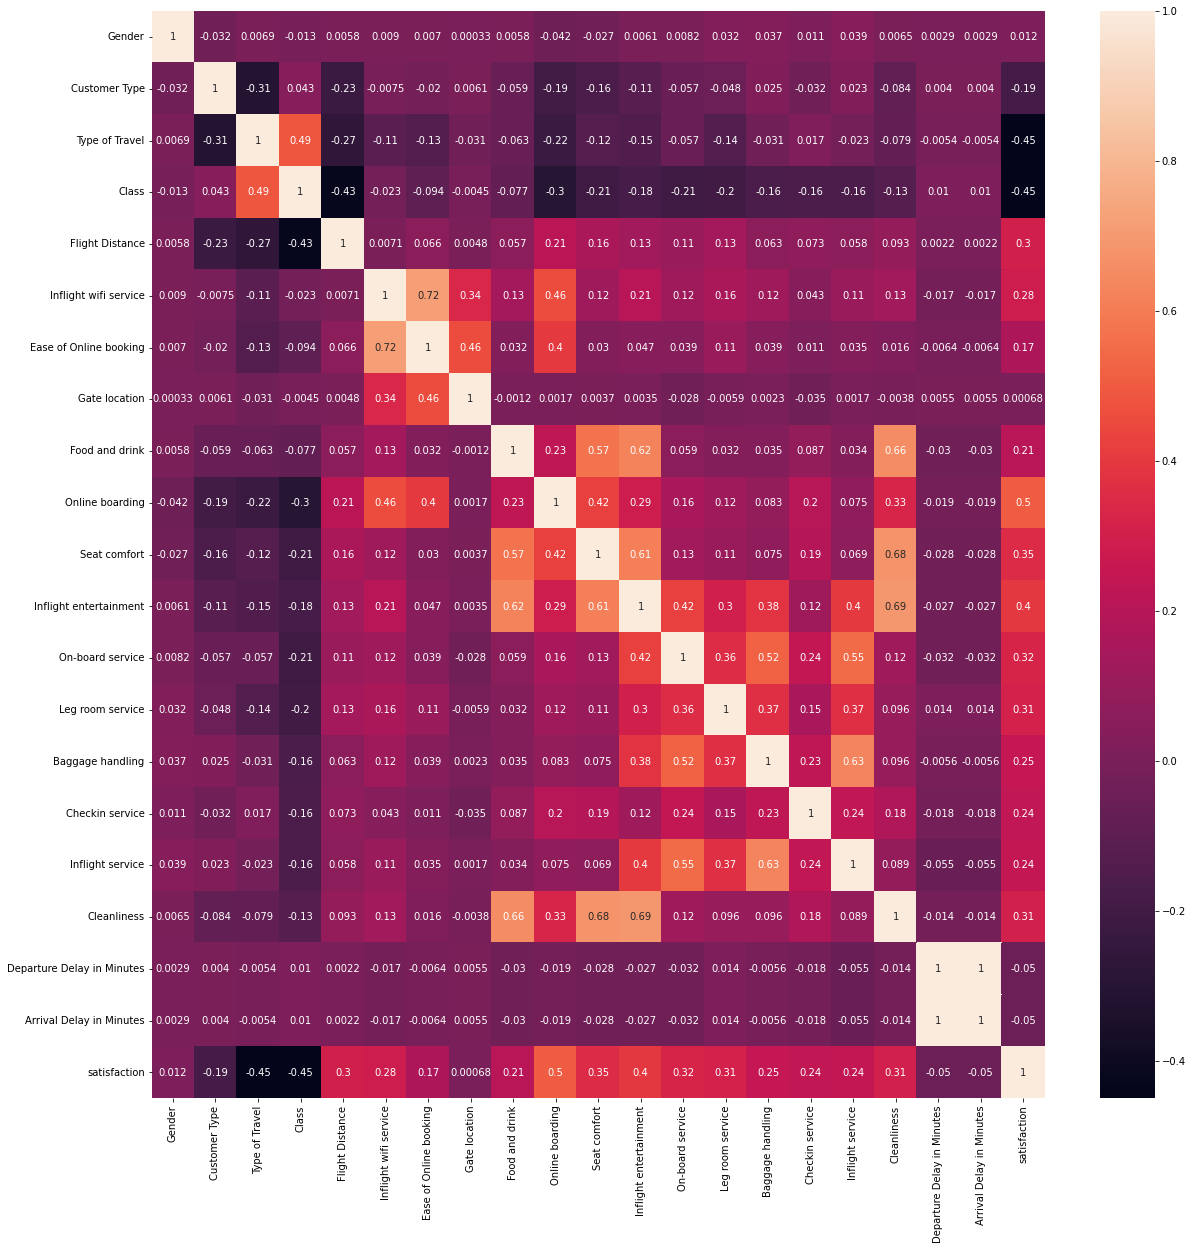

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(),annot= True)

In [ ]:
def data_preprocessing(data):
  # 쓸모없는 열 삭제 
  data = data.drop(data.iloc[:,[0,1]], axis = 1) 
  data = data.drop(['Age', 'Departure/Arrival time convenient'], axis = 1) 
  # 결측치 대체 
  data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Departure Delay in Minutes'])
  # 인코딩 
  column_list = ['Gender', 'Customer Type','Type of Travel','Class','satisfaction'] 
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  for column in column_list:
    le.fit(data[column])
    le_encoded = le.transform(data[column])
    data[column] = le_encoded
    print(le.classes_)
  # 정규화 
  from sklearn.preprocessing import StandardScaler
  num_features = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
  scaler = StandardScaler()
  scaler.fit(train[num_features])
  train[num_features] = scaler.transform(train[num_features])

  return data
train = data_preprocessing(train)
test = data_preprocessing(test)

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']
['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Business travel' 'Personal Travel']
['Business' 'Eco' 'Eco Plus']
['neutral or dissatisfied' 'satisfied']


In [ ]:
def data_preprocessing(data):
  # 쓸모없는 열 삭제 
  data = data.drop(data.iloc[:,[0,1]], axis = 1) 
  data = data.drop(['Age', 'Departure/Arrival time convenient'], axis = 1) 
  # 결측치 대체 
  data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Departure Delay in Minutes'])
  # 원-핫 인코딩 
  data['satisfaction'] = data['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
  data["Class"] = data["Class"].replace({"Eco":1,"Eco Plus":2,"Business":3})
  data = pd.get_dummies(data)
  # 정규화 
  from sklearn.preprocessing import StandardScaler
  num_features = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
  scaler = StandardScaler()
  scaler.fit(train[num_features])
  train[num_features] = scaler.transform(train[num_features])

  return data
train = data_preprocessing(train)
test = data_preprocessing(test)

In [ ]:
train.head()

,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,2,-0.731539,3,3,1,5,3,5,5,4,3,4,4,5,5,0.266393,0.070988,0,0,1,1,0,0,1
1,3,-0.957184,3,3,3,1,3,1,1,1,5,3,1,4,1,-0.361375,-0.238223,0,0,1,0,1,1,0
2,3,-0.047584,2,2,2,5,5,5,5,4,3,4,4,4,5,-0.387532,-0.392828,1,1,0,1,0,1,0
3,3,-0.629246,2,5,5,2,2,2,2,2,5,3,1,4,2,-0.099805,-0.160920,0,1,0,1,0,1,0
4,3,-0.978244,3,3,3,4,5,5,3,3,4,4,3,3,3,-0.387532,-0.392828,1,0,1,1,0,1,0


#### 전처리 : Train, Test 분리 

In [ ]:
X_train = train.drop(['satisfaction'], axis = 1)
y_train = train['satisfaction']
X_test = test.drop(['satisfaction'], axis = 1)
y_test = test['satisfaction']

# 모델 생성

In [ ]:
models = pd.DataFrame(columns = ['Model Name','Accuracy Score'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [ ]:
model_list = [('Random Forest Classifier', RandomForestClassifier(random_state = 49)),
              ('Support Vector Machines', SVC(random_state = 49)),
              ('Logistic Regression', LogisticRegression(random_state = 49)),
              ('Decision Tree Classifier',DecisionTreeClassifier(random_state = 49)),
              ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors = 2)),
              ('XGBoost Classifier',XGBClassifier(random_state = 49)),
              ('Gaussian Naive Bayes',GaussianNB())]

In [ ]:
for name, clf in model_list:
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  score = accuracy_score(y_test, pred)
  new_row = {'Model Name':name, 'Accuracy Score':score}
  models = models.append(new_row,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model Name,Accuracy Score
0,Random Forest Classifier,0.958654
5,XGBoost Classifier,0.936133
3,Decision Tree Classifier,0.868417
4,KNeighbors Classifier,0.697028
2,Logistic Regression,0.570334
6,Gaussian Naive Bayes,0.439406
1,Support Vector Machines,0.438982


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
rf_clf = RandomForestClassifier(random_state=49, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터 :', grid_cv.best_params_)
print("최고 예측 정확도 :", grid_cv.best_score_)

최적 하이퍼파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도 : 0.9501174160763781
